<div class="alert alert-block alert-info">
    <h1>Laboratorio III - 2024</h1>
    <h3>TP Final </h3>    
   <h5>Autores:</h5>
    <ul class="list-group">
        <li class="list-group-item"> Patricia Nuñez </li>
        <li class="list-group-item">Aureliano Chavarria</li>
        <li class="list-group-item">Gaston Larregui</li>
    </ul>
    <h5>Asignatura:</h5>    
    <ul class="list-group">
          <li class="list-group-item">Asignatura: Laboratorio III</li>
          <li class="list-group-item">Tema:  Trabajo Final</li>
          <li class="list-group-item">Profesor: Gustavo Denicolay</li>
     </ul>
</div>


# Cargar librerias

In [48]:
from datetime import datetime
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from scipy.stats import pearsonr
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from sklearn.metrics import mean_absolute_error, mean_squared_error
from scipy.stats import jarque_bera, shapiro, boxcox, probplot
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf
from statsmodels.stats.diagnostic import acorr_ljungbox, acorr_breusch_godfrey
from sklearn.metrics import mean_squared_error
import math
from statistics import mean
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.optimizers import RMSprop, Adam
import tensorflow as tf


## Grenerales

In [49]:
import pandas as pd
#Configuración de parametros de Pandas para mejor visualización
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', None)
pd.set_option('display.precision', 3)
pd.set_option('plotting.backend', 'matplotlib')
pd.options.mode.chained_assignment = None

# En produccion eliminar, se incluye por informacion
print(f'Pandas Version: {pd.__version__}')

Pandas Version: 2.1.4


In [50]:
import matplotlib
print(f'Matplotlib version: {matplotlib.__version__}')

Matplotlib version: 3.7.5


In [51]:
import numpy as np

np.set_printoptions(suppress=True)

# En produccion eliminar, se incluye por informacion
print(f'Numpy version: {np.__version__}')

Numpy version: 1.26.4


In [52]:
# En produccion eliminar, se incluye por informacion
import matplotlib
print(f'Matplotlib version: {matplotlib.__version__}')

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["figure.figsize"] = (15,7)

Matplotlib version: 3.7.5


In [53]:
import seaborn as sns

In [54]:
import warnings
warnings.filterwarnings("ignore")

# Carga de Datos

In [55]:
#from google.colab import drive
#drive.mount('/content/drive')

In [56]:
sell_in_path ='/home/familialarregui/buckets/b1/datasets/sell-in.txt'
tb_productos_path ='/home/familialarregui/buckets/b1/datasets/tb_productos.txt'
tb_stocks_path ='/home/familialarregui/buckets/b1/datasets/tb_stocks.txt'
prod_predecir_path ='/home/familialarregui/buckets/b1/datasets/productos_a_predecir.txt'
tb_prod_path ='/home/familialarregui/buckets/b1/datasets/prod_predecir_descrip.csv'


#sell_in_path ='/content/drive/My Drive/Maestria Ciencia de Datos/Segundo año/Segundo Cuatrimestre/LAB_III/data/sell-in.txt'
#tb_productos_path ='/content/drive/My Drive/Maestria Ciencia de Datos/Segundo año/Segundo Cuatrimestre/LAB_III/data/tb_productos.txt'
#tb_stocks_path ='/content/drive/My Drive/Maestria Ciencia de Datos/Segundo año/Segundo Cuatrimestre/LAB_III/data/tb_stocks.txt'
#prod_predecir_path ='/content/drive/My Drive/Maestria Ciencia de Datos/Segundo año/Segundo Cuatrimestre/LAB_III/data/productos_a_predecir.txt'
#tb_prod_path ='/content/drive/My Drive/Maestria Ciencia de Datos/Segundo año/Segundo Cuatrimestre/LAB_III/data/prod_predecir_descrip.csv'



In [57]:
#data = pd.read_csv(file_path)
#sell_in = pd.read_csv(sell_in_path, delimiter='\t')
df_sell = pd.read_csv(sell_in_path, delimiter='\t')
df_productos = pd.read_csv(tb_productos_path, delimiter='\t')
df_stocks = pd.read_csv(tb_stocks_path, delimiter='\t')
df_predecir = pd.read_csv(prod_predecir_path, delimiter='\t')
df_prod_sele = pd.read_csv(tb_prod_path, delimiter=';')

# Procesamiento inicial del dataset


## Procesamiento inicial

In [58]:
df_sell.head(3)

,periodo,customer_id,product_id,plan_precios_cuidados,cust_request_qty,cust_request_tn,tn
0,201701,10234,20524,0,2,0.053,0.053
1,201701,10032,20524,0,1,0.136,0.136
2,201701,10217,20524,0,1,0.030,0.030


In [59]:
df_ventas = pd.merge(df_sell, df_prod_sele, on='product_id', how='inner')

In [60]:
df_ventas.head()

,periodo,customer_id,product_id,plan_precios_cuidados,cust_request_qty,cust_request_tn,tn,cat1,cat2,cat3,brand,sku_size,descripcion
0,201701,10234,20524,0,2,0.053,0.053,HC,VAJILLA,Cristalino,Importado,500,Abrillantador
1,201701,10032,20524,0,1,0.136,0.136,HC,VAJILLA,Cristalino,Importado,500,Abrillantador
2,201701,10217,20524,0,1,0.030,0.030,HC,VAJILLA,Cristalino,Importado,500,Abrillantador
3,201701,10125,20524,0,1,0.023,0.023,HC,VAJILLA,Cristalino,Importado,500,Abrillantador
4,201701,10012,20524,0,11,1.545,1.545,HC,VAJILLA,Cristalino,Importado,500,Abrillantador


In [61]:
unique_counts = df_ventas.nunique()
print(unique_counts)

periodo                     36
customer_id                597
product_id                 780
plan_precios_cuidados        2
cust_request_qty            84
cust_request_tn          92001
tn                       91942
cat1                         4
cat2                        15
cat3                        84
brand                       35
sku_size                    67
descripcion                427
dtype: int64


In [62]:
# Filtrar productos por cat1
prod_HC = df_ventas[df_ventas['cat1'] == 'HC']
prod_FOODS = df_ventas[df_ventas['cat1'] == 'FOODS']
prod_PC = df_ventas[df_ventas['cat1'] == 'PC']
prod_REF = df_ventas[df_ventas['cat1'] == 'REF']


In [63]:
prod_HC.head()

,periodo,customer_id,product_id,plan_precios_cuidados,cust_request_qty,cust_request_tn,tn,cat1,cat2,cat3,brand,sku_size,descripcion
0,201701,10234,20524,0,2,0.053,0.053,HC,VAJILLA,Cristalino,Importado,500,Abrillantador
1,201701,10032,20524,0,1,0.136,0.136,HC,VAJILLA,Cristalino,Importado,500,Abrillantador
2,201701,10217,20524,0,1,0.030,0.030,HC,VAJILLA,Cristalino,Importado,500,Abrillantador
3,201701,10125,20524,0,1,0.023,0.023,HC,VAJILLA,Cristalino,Importado,500,Abrillantador
4,201701,10012,20524,0,11,1.545,1.545,HC,VAJILLA,Cristalino,Importado,500,Abrillantador


In [64]:
unique_counts = prod_HC.nunique()
print(unique_counts)

periodo                     36
customer_id                566
product_id                 187
plan_precios_cuidados        2
cust_request_qty            81
cust_request_tn          40596
tn                       40629
cat1                         1
cat2                         6
cat3                        22
brand                       11
sku_size                    30
descripcion                104
dtype: int64


In [65]:
#total_prod_FOODS = prod_FOODS.groupby(['periodo','product_id']).agg({'tn':'sum'}).reset_index()

In [66]:
#Agrupación de toneladas de cada producto en cada mes
total_prod_HC = prod_HC.groupby(['periodo']).agg({'tn':'sum'}).reset_index()
total_prod_FOODS = prod_FOODS.groupby(['periodo']).agg({'tn':'sum'}).reset_index()
total_prod_PC = prod_PC.groupby(['periodo']).agg({'tn':'sum'}).reset_index()
total_prod_REF = prod_REF.groupby(['periodo']).agg({'tn':'sum'}).reset_index()

In [67]:
total_prod_HC.head()

,periodo,tn
0,201701,16043.732
1,201702,16020.703
2,201703,23236.570
3,201704,19548.343
4,201705,23489.307


In [68]:
# Convertir la columna 'Mes' a formato de fecha
total_prod_HC['periodo'] = pd.to_datetime(total_prod_HC['periodo'], format='%Y%m')
total_prod_FOODS['periodo'] = pd.to_datetime(total_prod_FOODS['periodo'], format='%Y%m')
total_prod_PC['periodo'] = pd.to_datetime(total_prod_PC['periodo'], format='%Y%m')
prod_REF['periodo'] = pd.to_datetime(prod_REF['periodo'], format='%Y%m')

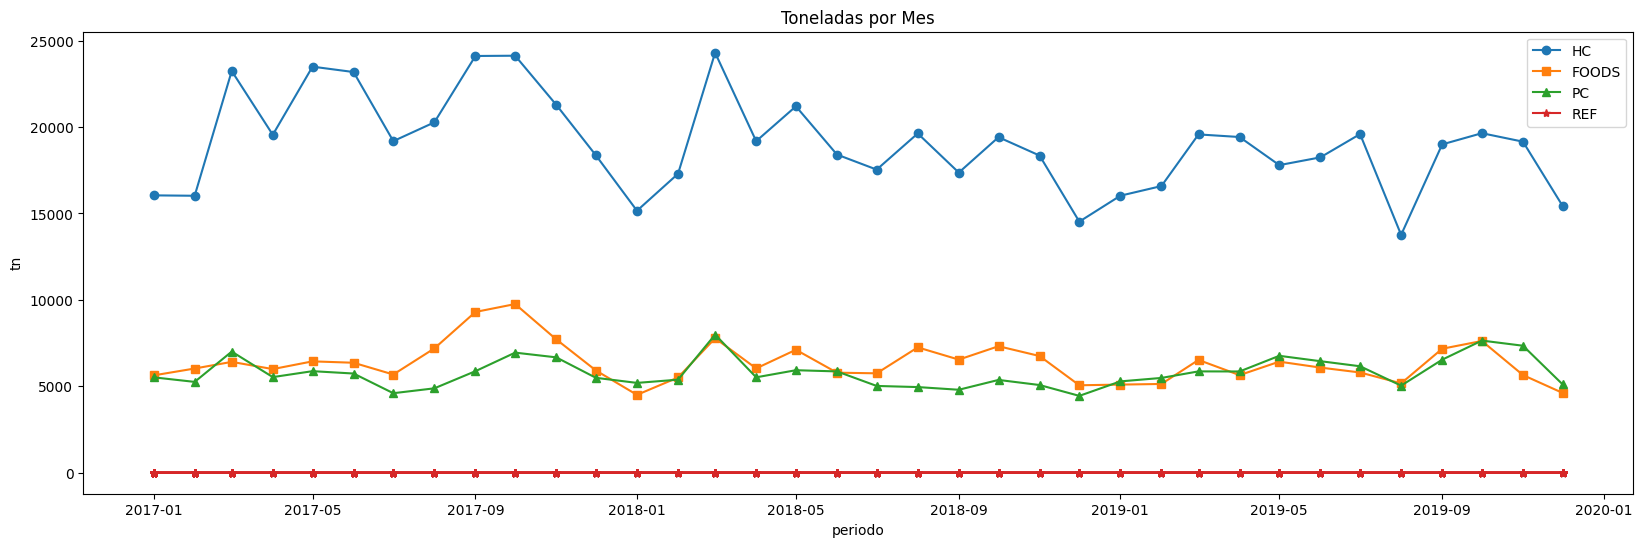

In [69]:
plt.figure(figsize=(20, 6))

# Graficar los datos de cada DataFrame
plt.plot(total_prod_HC['periodo'], total_prod_HC['tn'], label='HC', marker='o')
plt.plot(total_prod_FOODS['periodo'], total_prod_FOODS['tn'], label='FOODS', marker='s')
plt.plot(total_prod_PC['periodo'], total_prod_PC['tn'], label='PC', marker='^')
plt.plot(prod_REF['periodo'], prod_REF['tn'], label='REF', marker='*')

# Añadir etiquetas y título
plt.xlabel('periodo')
plt.ylabel('tn')
plt.title('Toneladas por Mes')
plt.legend()

# Mostrar la gráfica
plt.show()

In [70]:
HC_norm = total_prod_HC.copy()
FOODS_norm = total_prod_FOODS.copy()
PC_norm = total_prod_PC.copy()
REF_norm = total_prod_REF.copy()

In [71]:
# Crear un objeto MinMaxScaler
scaler = MinMaxScaler()
HC_norm['tn_Normalizado'] = scaler.fit_transform(HC_norm[['tn']])
FOODS_norm['tn_Normalizado'] = scaler.fit_transform(FOODS_norm[['tn']])
PC_norm['tn_Normalizado'] = scaler.fit_transform(PC_norm[['tn']])
REF_norm['tn_Normalizado'] = scaler.fit_transform(REF_norm[['tn']])

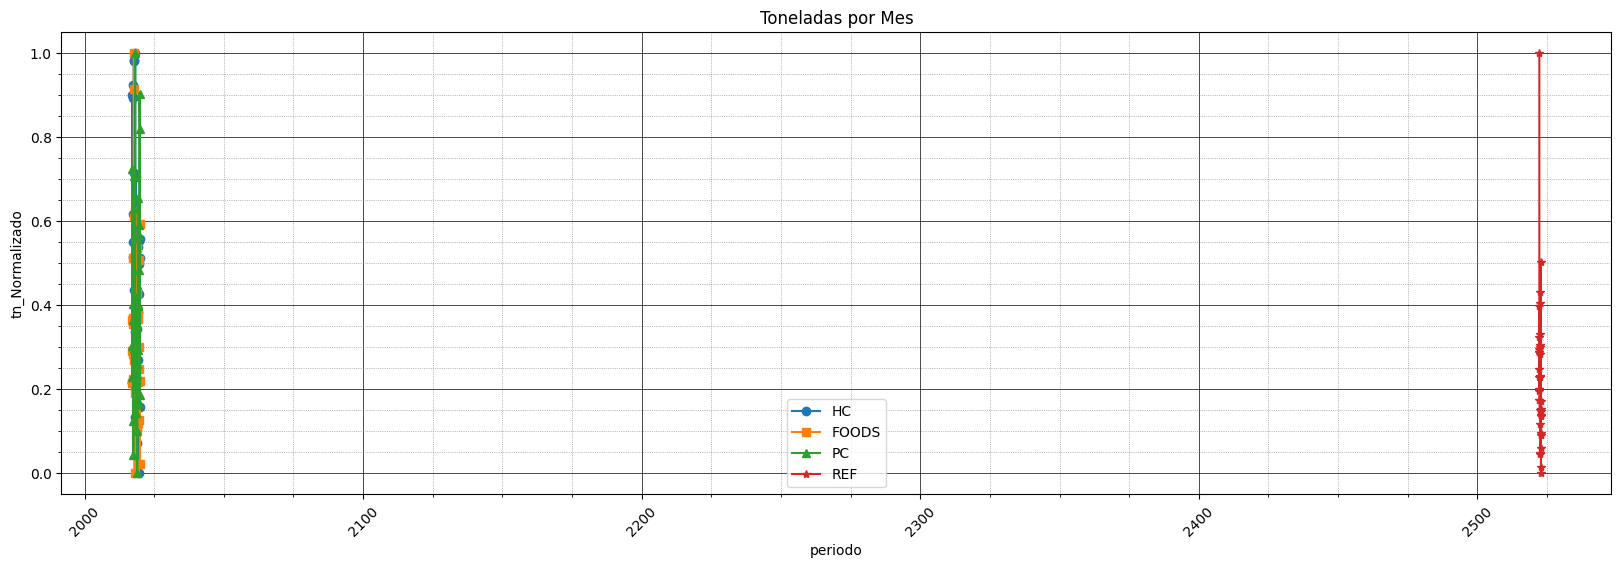

In [72]:
plt.figure(figsize=(20, 6))

# Graficar los datos de cada DataFrame
plt.plot(HC_norm['periodo'], HC_norm['tn_Normalizado'], label='HC', marker='o')
plt.plot(FOODS_norm['periodo'], FOODS_norm['tn_Normalizado'], label='FOODS', marker='s')
plt.plot(PC_norm['periodo'], PC_norm['tn_Normalizado'], label='PC', marker='^')
plt.plot(REF_norm['periodo'], REF_norm['tn_Normalizado'], label='REF', marker='*')

# Añadir cuadrícula
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

# Añadir divisiones en el eje x y eje y
plt.xticks(rotation=45)  # Rotar etiquetas del eje x para mejor legibilidad
plt.minorticks_on()
plt.grid(which='major', linestyle='-', linewidth='0.5', color='black')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='gray')

# Añadir etiquetas y título
plt.xlabel('periodo')
plt.ylabel('tn_Normalizado')
plt.title('Toneladas por Mes')
plt.legend()

# Mostrar la gráfica
plt.show()

## Análisis categoria HC

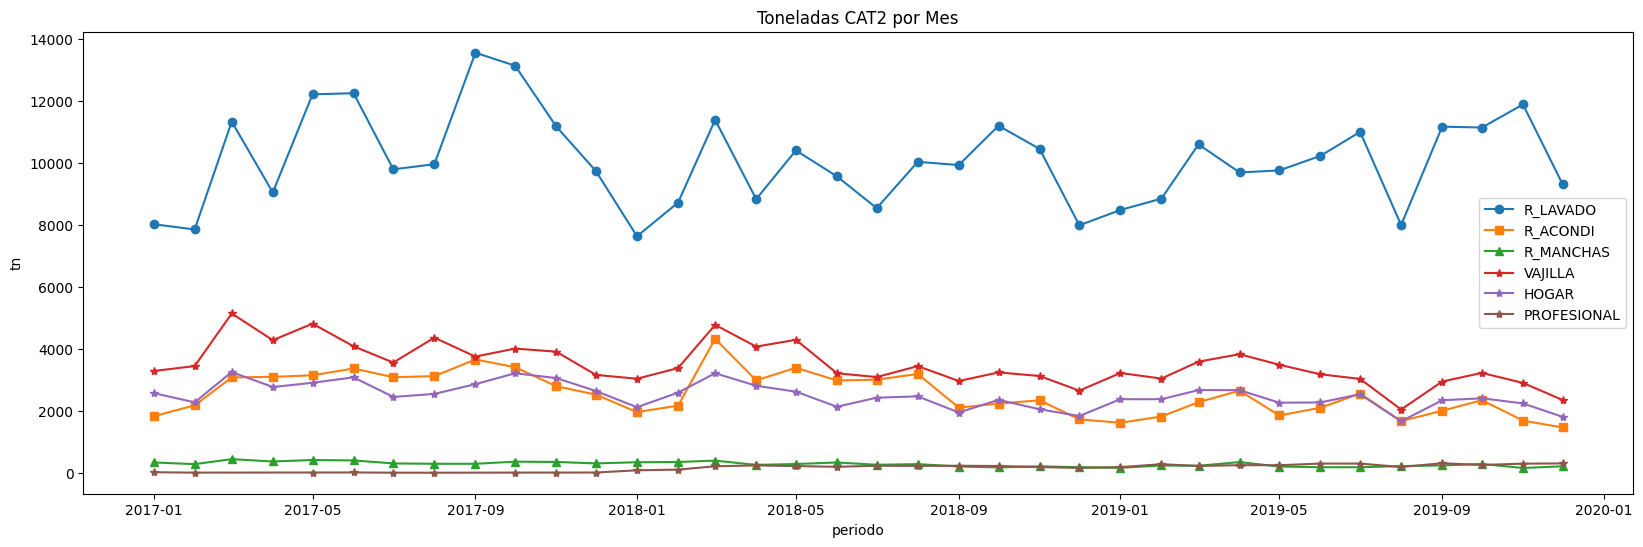

In [73]:
#prod_HC.head(2)
#total_prod_HC.head(2)

# Filtrar productos por cat2
HC_R_LAVADO = prod_HC[prod_HC['cat2'] == 'ROPA LAVADO']
HC_R_ACONDI = prod_HC[prod_HC['cat2'] == 'ROPA ACONDICIONADOR']
HC_R_MANCHAS = prod_HC[prod_HC['cat2'] == 'ROPA MANCHAS']
HC_VAJILLA = prod_HC[prod_HC['cat2'] == 'VAJILLA']
HC_HOGAR = prod_HC[prod_HC['cat2'] == 'HOGAR']
HC_PROFESIONAL = prod_HC[prod_HC['cat2'] == 'PROFESIONAL']

total_HC_R_LAVADO = HC_R_LAVADO.groupby(['periodo']).agg({'tn':'sum'}).reset_index()
total_HC_R_ACONDI = HC_R_ACONDI.groupby(['periodo']).agg({'tn':'sum'}).reset_index()
total_HC_R_MANCHAS = HC_R_MANCHAS.groupby(['periodo']).agg({'tn':'sum'}).reset_index()
total_HC_VAJILLA = HC_VAJILLA.groupby(['periodo']).agg({'tn':'sum'}).reset_index()
total_HC_HOGAR = HC_HOGAR.groupby(['periodo']).agg({'tn':'sum'}).reset_index()
total_HC_PROFESIONAL = HC_PROFESIONAL.groupby(['periodo']).agg({'tn':'sum'}).reset_index()

total_HC_R_LAVADO['periodo'] = pd.to_datetime(total_HC_R_LAVADO['periodo'], format='%Y%m')
total_HC_R_ACONDI['periodo'] = pd.to_datetime(total_HC_R_ACONDI['periodo'], format='%Y%m')
total_HC_R_MANCHAS['periodo'] = pd.to_datetime(total_HC_R_MANCHAS['periodo'], format='%Y%m')
total_HC_VAJILLA['periodo'] = pd.to_datetime(total_HC_VAJILLA['periodo'], format='%Y%m')
total_HC_HOGAR['periodo'] = pd.to_datetime(total_HC_HOGAR['periodo'], format='%Y%m')
total_HC_PROFESIONAL['periodo'] = pd.to_datetime(total_HC_PROFESIONAL['periodo'], format='%Y%m')

# Gráfica

plt.figure(figsize=(20, 6))

# Graficar los datos de cada DataFrame
plt.plot(total_HC_R_LAVADO['periodo'], total_HC_R_LAVADO['tn'], label='R_LAVADO', marker='o')
plt.plot(total_HC_R_ACONDI['periodo'], total_HC_R_ACONDI['tn'], label='R_ACONDI', marker='s')
plt.plot(total_HC_R_MANCHAS['periodo'], total_HC_R_MANCHAS['tn'], label='R_MANCHAS', marker='^')
plt.plot(total_HC_VAJILLA['periodo'], total_HC_VAJILLA['tn'], label='VAJILLA', marker='*')
plt.plot(total_HC_HOGAR['periodo'], total_HC_HOGAR['tn'], label='HOGAR', marker='*')
plt.plot(total_HC_PROFESIONAL['periodo'], total_HC_PROFESIONAL['tn'], label='PROFESIONAL', marker='*')


# Añadir etiquetas y título
plt.xlabel('periodo')
plt.ylabel('tn')
plt.title('Toneladas CAT2 por Mes')
plt.legend()

# Mostrar la gráfica
plt.show()

# De acuerdo al gráfico puedo formar 3 grupos para la cat2 de los productos HC
# grupo 1 - HC --> R_LAVADO
# grupo 2 - HC --> R_ACONDI / VAJILLA / HOGAR
# grupo 3 - HC --> R_MANCHAS / PROFESIONAL


In [74]:
unique_counts = HC_PROFESIONAL.nunique()
print(unique_counts)

periodo                    33
customer_id               221
product_id                 15
plan_precios_cuidados       1
cust_request_qty           50
cust_request_tn          1102
tn                       1108
cat1                        1
cat2                        1
cat3                       11
brand                       6
sku_size                    5
descripcion                15
dtype: int64


## Análisis FOODS

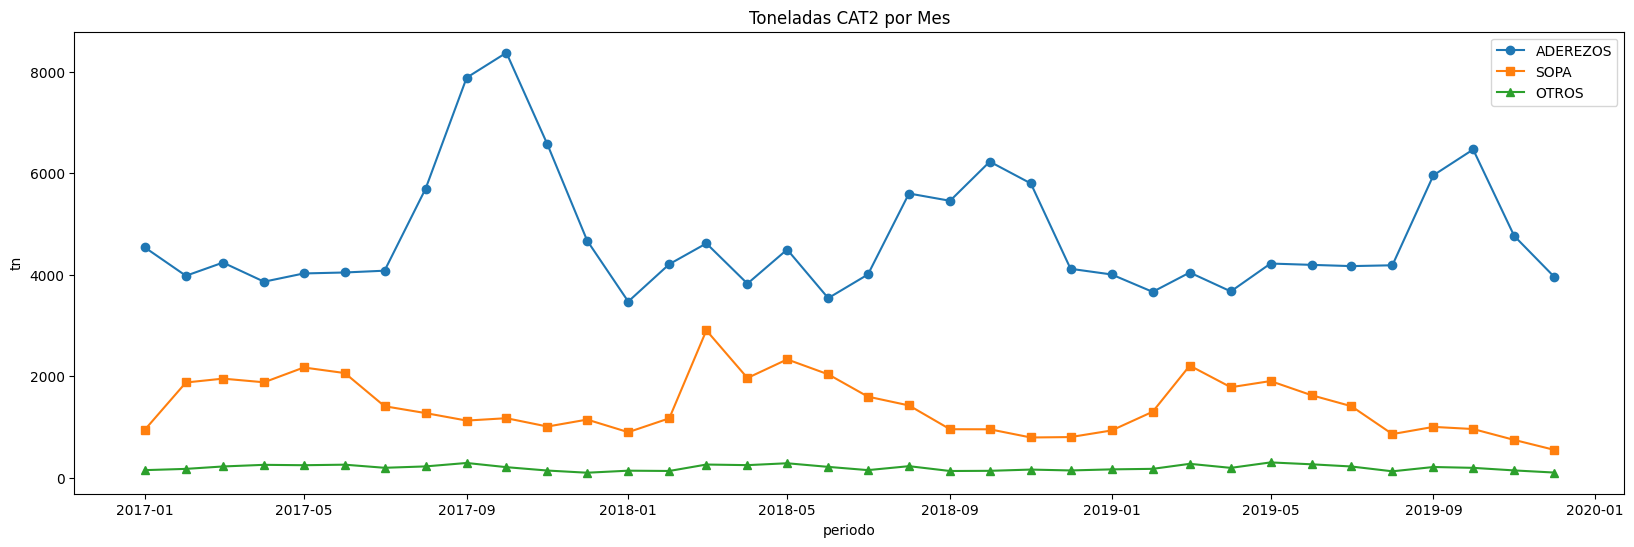

In [75]:
#prod_HC --> data por cat1
#prod_FOODS --> data por cat1
#prod_PC --> data por cat1
#prod_REF--> data por cat1

#total_prod_HC --> tn total de HC
#total_prod_FOODS   --> tn total de FOODS
#total_prod_PC --> tn total de PC
#total_prod_REF--> tn total de REF


# Filtrar productos por cat2
FOODS_ADEREZOS = prod_FOODS[prod_FOODS['cat2'] == 'ADEREZOS']
FOODS_SOPA = prod_FOODS[prod_FOODS['cat2'] == 'SOPAS Y CALDOS']
FOODS_OTROS = prod_FOODS[prod_FOODS['cat2'] == 'OTROS']

total_FOODS_ADEREZOS = FOODS_ADEREZOS.groupby(['periodo']).agg({'tn':'sum'}).reset_index()
total_FOODS_SOPA = FOODS_SOPA.groupby(['periodo']).agg({'tn':'sum'}).reset_index()
total_FOODS_OTROS = FOODS_OTROS.groupby(['periodo']).agg({'tn':'sum'}).reset_index()

total_FOODS_ADEREZOS['periodo'] = pd.to_datetime(total_FOODS_ADEREZOS['periodo'], format='%Y%m')
total_FOODS_SOPA['periodo'] = pd.to_datetime(total_FOODS_SOPA['periodo'], format='%Y%m')
total_FOODS_OTROS['periodo'] = pd.to_datetime(total_FOODS_OTROS['periodo'], format='%Y%m')

# Gráfica

plt.figure(figsize=(20, 6))

# Graficar los datos de cada DataFrame
plt.plot(total_FOODS_ADEREZOS['periodo'], total_FOODS_ADEREZOS['tn'], label='ADEREZOS', marker='o')
plt.plot(total_FOODS_SOPA['periodo'], total_FOODS_SOPA['tn'], label='SOPA', marker='s')
plt.plot(total_FOODS_OTROS['periodo'], total_FOODS_OTROS['tn'], label='OTROS', marker='^')

# Añadir etiquetas y título
plt.xlabel('periodo')
plt.ylabel('tn')
plt.title('Toneladas CAT2 por Mes')
plt.legend()

# Mostrar la gráfica
plt.show()

# De acuerdo al gráfico no se realiza ninguna agrupación, quedando los3 grupos originales para la cat2 de los productos FOODS
# grupo 1 - FOODS --> ADEREZOS
# grupo 2 - FOODS --> SOPA
# grupo 3 - FOODS --> OTROS


In [76]:
unique_counts = FOODS_OTROS.nunique()
print(unique_counts)

periodo                   36
customer_id              414
product_id                 9
plan_precios_cuidados      1
cust_request_qty          48
cust_request_tn          736
tn                       737
cat1                       1
cat2                       1
cat3                       3
brand                      1
sku_size                   3
descripcion                8
dtype: int64


## Análisis PC

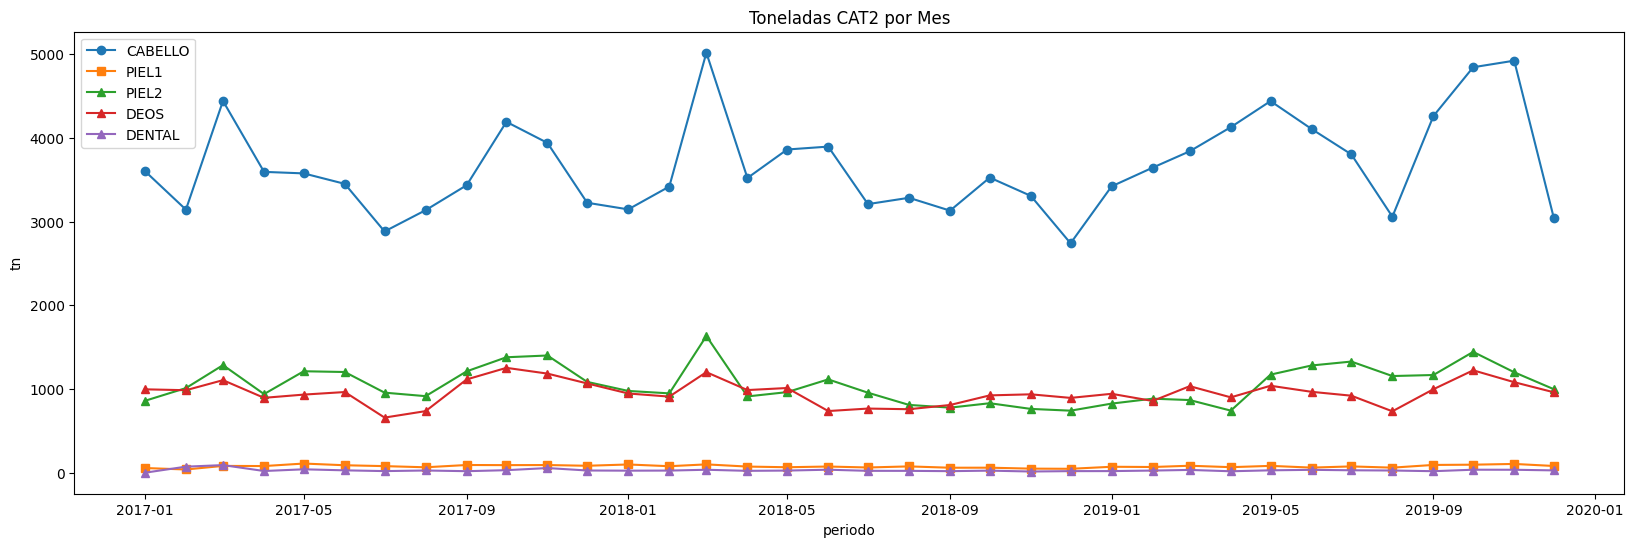

In [77]:
#prod_HC --> data por cat1
#prod_FOODS --> data por cat1
#prod_PC --> data por cat1
#prod_REF--> data por cat1

#total_prod_HC --> tn total de HC
#total_prod_FOODS   --> tn total de FOODS
#total_prod_PC --> tn total de PC
#total_prod_REF--> tn total de REF


# Filtrar productos por cat2
PC_CABELLO = prod_PC[prod_PC['cat2'] == 'CABELLO']
PC_PIEL1 = prod_PC[prod_PC['cat2'] == 'PIEL1']
PC_PIEL2 = prod_PC[prod_PC['cat2'] == 'PIEL2']
PC_DEOS = prod_PC[prod_PC['cat2'] == 'DEOS']
PC_DENTAL = prod_PC[prod_PC['cat2'] == 'DENTAL']

total_PC_CABELLO = PC_CABELLO.groupby(['periodo']).agg({'tn':'sum'}).reset_index()
total_PC_PIEL1 = PC_PIEL1.groupby(['periodo']).agg({'tn':'sum'}).reset_index()
total_PC_PIEL2 = PC_PIEL2.groupby(['periodo']).agg({'tn':'sum'}).reset_index()
total_PC_DEOS = PC_DEOS.groupby(['periodo']).agg({'tn':'sum'}).reset_index()
total_PC_DENTAL = PC_DENTAL.groupby(['periodo']).agg({'tn':'sum'}).reset_index()


total_PC_CABELLO['periodo'] = pd.to_datetime(total_PC_CABELLO['periodo'], format='%Y%m')
total_PC_PIEL1['periodo'] = pd.to_datetime(total_PC_PIEL1['periodo'], format='%Y%m')
total_PC_PIEL2['periodo'] = pd.to_datetime(total_PC_PIEL2['periodo'], format='%Y%m')
total_PC_DEOS['periodo'] = pd.to_datetime(total_PC_DEOS['periodo'], format='%Y%m')
total_PC_DENTAL['periodo'] = pd.to_datetime(total_PC_DENTAL['periodo'], format='%Y%m')

# Gráfica

plt.figure(figsize=(20, 6))

# Graficar los datos de cada DataFrame
plt.plot(total_PC_CABELLO['periodo'], total_PC_CABELLO['tn'], label='CABELLO', marker='o')
plt.plot(total_PC_PIEL1['periodo'], total_PC_PIEL1['tn'], label='PIEL1', marker='s')
plt.plot(total_PC_PIEL2['periodo'], total_PC_PIEL2['tn'], label='PIEL2', marker='^')
plt.plot(total_PC_DEOS['periodo'], total_PC_DEOS['tn'], label='DEOS', marker='^')
plt.plot(total_PC_DENTAL['periodo'], total_PC_DENTAL['tn'], label='DENTAL', marker='^')


# Añadir etiquetas y título
plt.xlabel('periodo')
plt.ylabel('tn')
plt.title('Toneladas CAT2 por Mes')
plt.legend()

# Mostrar la gráfica
plt.show()

# De acuerdo al gráfico puedo formar 3 grupos para la cat2 de los productos PC
# grupo 1 - PC --> CABELLO
# grupo 2 - PC --> PIEL1 / PIEL2
# grupo 3 - PC --> DEOS / DENTAL

In [78]:
unique_counts = PC_DENTAL.nunique()
print(unique_counts)

periodo                   36
customer_id              507
product_id                14
plan_precios_cuidados      1
cust_request_qty          39
cust_request_tn          567
tn                       570
cat1                       1
cat2                       1
cat3                       2
brand                      1
sku_size                   4
descripcion               12
dtype: int64


# Generación de grupos

In [79]:
# GRUPO PARA CATEGORIA 2 DE LOS PRODUCTOS HC
G1_HC = HC_R_LAVADO.copy()
G2_HC = pd.concat([HC_R_ACONDI, HC_VAJILLA, HC_HOGAR], ignore_index=True)
G3_HC = pd.concat([HC_PROFESIONAL, HC_R_MANCHAS], ignore_index=True)

# GRUPO PARA CATEGORIA 2 DE LOS PRODUCTOS FOODS
G1_FOODS = FOODS_ADEREZOS.copy()
G2_FOODS = FOODS_SOPA.copy()
G3_FOODS = FOODS_OTROS.copy()

# GRUPO PARA CATEGORIA 2 DE LOS PRODUCTOS PC
G1_PC = PC_CABELLO.copy()
G2_PC = pd.concat([PC_PIEL1, PC_PIEL2], ignore_index=True)
G3_PC = pd.concat([PC_DEOS, PC_DENTAL], ignore_index=True)

# GRUPO PARA CATEGORIA 2 DE LOS PRODUCTOS REF
G1_REF = prod_REF.copy()


# Modelo LSTM

In [80]:
seq_length = 6
act = 'relu'
N_UNITS = 15
BATCH = 6
EPOCHS = 100
vp = 0.2
optim= 'adam'


## Categoria HC

### G1_HC

In [81]:
# Creación del modelo

# Ajustar parámetros para reproducibilidad del entrenamiento
tf.random.set_seed(123)
tf.config.experimental.enable_op_determinism()

df_prod = G1_HC.copy()

#Agrupación de toneladas de cada producto en cada mes
total_df = df_prod.groupby(['periodo','product_id']).agg({'tn':'sum'}).reset_index() # Predicción 202002

# Ahora realizamos un pivot del df "producto" para luego análizar cada producto en una serie de tiempo

# Pasamos 'product_id' a string, esto se hace para luego poder tomar la columna como string para graficar
total_df['product_id'] = total_df['product_id'].astype(str)
# Pivotar el DataFrame cant_prod
total_df = total_df.pivot(index='periodo', columns='product_id', values='tn').reset_index()
# Renombrar las columnas para que sean más legibles
total_df.columns.name = None

# Reemplazar los valores NaN por cero
total_df = total_df.fillna(0)

total_df = total_df.drop(columns=['periodo'])

df = total_df.copy()

scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df)

# Crear secuencias de entrenamiento y etiquetas
def create_sequences(data, seq_length):
    xs, ys = [], []
    for i in range(len(data)-seq_length):
        x = data[i:i+seq_length]
        xs.append(x)
    return np.array(xs)

seq_length = seq_length  # Usamos 3 meses anteriores para predecir el siguiente
X = create_sequences(scaled_data, seq_length)

# Dividir en entrenamiento y prueba
split = int(0.8 * len(X))
X_train, X_test = X[:split], X[split:]

# Función para crear el modelo LSTM
def create_lstm_model(input_shape):
    model = Sequential()
    model.add(LSTM(N_UNITS, input_shape=input_shape))
    model.add(Dense(1, activation=act))
    model.compile(optimizer=optim, loss='mse')
    return model

# Diccionario para almacenar las predicciones de cada producto
predicciones = {}

for i in range(df.shape[1]):   # CAMBIAR DF NECESARIO
    y = scaled_data[seq_length:, i]  # Etiquetas para el producto i
    y_train, y_test = y[:split], y[split:]

    # Crear y entrenar el modelo
    model = create_lstm_model((seq_length, df.shape[1])) # CAMBIAR DF NECESARIO
    model.fit(X_train, y_train, epochs=EPOCHS, batch_size=BATCH, validation_split=vp, verbose=0)

    # Usar los últimos 3 meses del conjunto de datos para predecir el mes 38
    last_3_months = scaled_data[-seq_length:]
    last_3_months = last_3_months.reshape((1, seq_length, df.shape[1]))  # CAMBIAR DF NECESARIO

    # Predecir el mes 38 para el producto i
    predicted_38 = model.predict(last_3_months)

    # Invertir la normalización para obtener los valores originales
    predicted_38_original = scaler.inverse_transform(np.repeat(predicted_38, df.shape[1]).reshape(-1, df.shape[1]))[:, i] # CAMBIAR DF NECESARIO
    nombre_columna = df.columns[i] # Capturar el nombre de la columna (producto)
    # Guardar la predicción en el diccionario
    predicciones[nombre_columna] = predicted_38_original[0]

# Convertir el diccionario de predicciones en un DataFrame
predicciones_G1_HC = pd.DataFrame(list(predicciones.items()), columns=['product_id', 'tn'])
predicciones_G1_HC['tn'] = predicciones_G1_HC['tn'].apply(lambda x: max(x, 0))
# Mostrar el DataFrame de predicciones
#print(predicciones_df)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 164ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 156ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 158ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 156ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 179ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 153ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 166ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 153ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 153ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 162ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 152ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 154ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 154ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 152ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 154ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 155ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 151ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 147ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 149ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 149ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 149ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 149ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 149ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 149ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 149ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 

### G2_HC

In [82]:
# Creación del modelo

# Ajustar parámetros para reproducibilidad del entrenamiento
tf.random.set_seed(123)
tf.config.experimental.enable_op_determinism()

df_prod = G2_HC.copy()

#Agrupación de toneladas de cada producto en cada mes
total_df = df_prod.groupby(['periodo','product_id']).agg({'tn':'sum'}).reset_index() # Predicción 202002

# Ahora realizamos un pivot del df "producto" para luego análizar cada producto en una serie de tiempo

# Pasamos 'product_id' a string, esto se hace para luego poder tomar la columna como string para graficar
total_df['product_id'] = total_df['product_id'].astype(str)
# Pivotar el DataFrame cant_prod
total_df = total_df.pivot(index='periodo', columns='product_id', values='tn').reset_index()
# Renombrar las columnas para que sean más legibles
total_df.columns.name = None

# Reemplazar los valores NaN por cero
total_df = total_df.fillna(0)

total_df = total_df.drop(columns=['periodo'])

df = total_df.copy()

scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df)

# Crear secuencias de entrenamiento y etiquetas
def create_sequences(data, seq_length):
    xs, ys = [], []
    for i in range(len(data)-seq_length):
        x = data[i:i+seq_length]
        xs.append(x)
    return np.array(xs)

seq_length = seq_length  # Usamos 3 meses anteriores para predecir el siguiente
X = create_sequences(scaled_data, seq_length)

# Dividir en entrenamiento y prueba
split = int(0.8 * len(X))
X_train, X_test = X[:split], X[split:]

# Función para crear el modelo LSTM
def create_lstm_model(input_shape):
    model = Sequential()
    model.add(LSTM(N_UNITS, input_shape=input_shape))
    model.add(Dense(1, activation=act))
    model.compile(optimizer=optim, loss='mse')
    return model

# Diccionario para almacenar las predicciones de cada producto
predicciones = {}

for i in range(df.shape[1]):   # CAMBIAR DF NECESARIO
    y = scaled_data[seq_length:, i]  # Etiquetas para el producto i
    y_train, y_test = y[:split], y[split:]

    # Crear y entrenar el modelo
    model = create_lstm_model((seq_length, df.shape[1])) # CAMBIAR DF NECESARIO
    model.fit(X_train, y_train, epochs=EPOCHS, batch_size=BATCH, validation_split=vp, verbose=0)

    # Usar los últimos 3 meses del conjunto de datos para predecir el mes 38
    last_3_months = scaled_data[-seq_length:]
    last_3_months = last_3_months.reshape((1, seq_length, df.shape[1]))  # CAMBIAR DF NECESARIO

    # Predecir el mes 38 para el producto i
    predicted_38 = model.predict(last_3_months)

    # Invertir la normalización para obtener los valores originales
    predicted_38_original = scaler.inverse_transform(np.repeat(predicted_38, df.shape[1]).reshape(-1, df.shape[1]))[:, i] # CAMBIAR DF NECESARIO
    nombre_columna = df.columns[i] # Capturar el nombre de la columna (producto)
    # Guardar la predicción en el diccionario
    predicciones[nombre_columna] = predicted_38_original[0]

# Convertir el diccionario de predicciones en un DataFrame
predicciones_G2_HC = pd.DataFrame(list(predicciones.items()), columns=['product_id', 'tn'])
predicciones_G2_HC['tn'] = predicciones_G2_HC['tn'].apply(lambda x: max(x, 0))
# Mostrar el DataFrame de predicciones
#print(predicciones_df)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 162ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 159ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 156ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 153ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 155ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 154ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 160ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 154ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 155ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 155ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 154ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 154ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 152ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 153ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 151ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 161ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 150ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 152ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 153ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 160ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 153ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 154ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 158ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 

### G3_HC

In [83]:
# Creación del modelo

# Ajustar parámetros para reproducibilidad del entrenamiento
tf.random.set_seed(123)
tf.config.experimental.enable_op_determinism()

df_prod = G3_HC.copy()

#Agrupación de toneladas de cada producto en cada mes
total_df = df_prod.groupby(['periodo','product_id']).agg({'tn':'sum'}).reset_index() # Predicción 202002

# Ahora realizamos un pivot del df "producto" para luego análizar cada producto en una serie de tiempo

# Pasamos 'product_id' a string, esto se hace para luego poder tomar la columna como string para graficar
total_df['product_id'] = total_df['product_id'].astype(str)
# Pivotar el DataFrame cant_prod
total_df = total_df.pivot(index='periodo', columns='product_id', values='tn').reset_index()
# Renombrar las columnas para que sean más legibles
total_df.columns.name = None

# Reemplazar los valores NaN por cero
total_df = total_df.fillna(0)

total_df = total_df.drop(columns=['periodo'])

df = total_df.copy()

scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df)

# Crear secuencias de entrenamiento y etiquetas
def create_sequences(data, seq_length):
    xs, ys = [], []
    for i in range(len(data)-seq_length):
        x = data[i:i+seq_length]
        xs.append(x)
    return np.array(xs)

seq_length = seq_length  # Usamos 3 meses anteriores para predecir el siguiente
X = create_sequences(scaled_data, seq_length)

# Dividir en entrenamiento y prueba
split = int(0.8 * len(X))
X_train, X_test = X[:split], X[split:]

# Función para crear el modelo LSTM
def create_lstm_model(input_shape):
    model = Sequential()
    model.add(LSTM(N_UNITS, input_shape=input_shape))
    model.add(Dense(1, activation=act))
    model.compile(optimizer=optim, loss='mse')
    return model

# Diccionario para almacenar las predicciones de cada producto
predicciones = {}

for i in range(df.shape[1]):   # CAMBIAR DF NECESARIO
    y = scaled_data[seq_length:, i]  # Etiquetas para el producto i
    y_train, y_test = y[:split], y[split:]

    # Crear y entrenar el modelo
    model = create_lstm_model((seq_length, df.shape[1])) # CAMBIAR DF NECESARIO
    model.fit(X_train, y_train, epochs=EPOCHS, batch_size=BATCH, validation_split=vp, verbose=0)

    # Usar los últimos 3 meses del conjunto de datos para predecir el mes 38
    last_3_months = scaled_data[-seq_length:]
    last_3_months = last_3_months.reshape((1, seq_length, df.shape[1]))  # CAMBIAR DF NECESARIO

    # Predecir el mes 38 para el producto i
    predicted_38 = model.predict(last_3_months)

    # Invertir la normalización para obtener los valores originales
    predicted_38_original = scaler.inverse_transform(np.repeat(predicted_38, df.shape[1]).reshape(-1, df.shape[1]))[:, i] # CAMBIAR DF NECESARIO
    nombre_columna = df.columns[i] # Capturar el nombre de la columna (producto)
    # Guardar la predicción en el diccionario
    predicciones[nombre_columna] = predicted_38_original[0]

# Convertir el diccionario de predicciones en un DataFrame
predicciones_G3_HC = pd.DataFrame(list(predicciones.items()), columns=['product_id', 'tn'])
predicciones_G3_HC['tn'] = predicciones_G3_HC['tn'].apply(lambda x: max(x, 0))
# Mostrar el DataFrame de predicciones
#print(predicciones_df)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 167ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 164ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 164ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step


## Categoria FOODS

In [84]:
# GRUPO PARA CATEGORIA 2 DE LOS PRODUCTOS FOODS
#G1_FOODS = FOODS_ADEREZOS.copy()
#G2_FOODS = FOODS_SOPA.copy()
#G3_FOODS = FOODS_OTROS.copy()

### G1_FOODS

In [85]:
# Creación del modelo

# Ajustar parámetros para reproducibilidad del entrenamiento
tf.random.set_seed(123)
tf.config.experimental.enable_op_determinism()

df_prod = G1_FOODS.copy()

#Agrupación de toneladas de cada producto en cada mes
total_df = df_prod.groupby(['periodo','product_id']).agg({'tn':'sum'}).reset_index() # Predicción 202002

# Ahora realizamos un pivot del df "producto" para luego análizar cada producto en una serie de tiempo

# Pasamos 'product_id' a string, esto se hace para luego poder tomar la columna como string para graficar
total_df['product_id'] = total_df['product_id'].astype(str)
# Pivotar el DataFrame cant_prod
total_df = total_df.pivot(index='periodo', columns='product_id', values='tn').reset_index()
# Renombrar las columnas para que sean más legibles
total_df.columns.name = None

# Reemplazar los valores NaN por cero
total_df = total_df.fillna(0)

total_df = total_df.drop(columns=['periodo'])

df = total_df.copy()

scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df)

# Crear secuencias de entrenamiento y etiquetas
def create_sequences(data, seq_length):
    xs, ys = [], []
    for i in range(len(data)-seq_length):
        x = data[i:i+seq_length]
        xs.append(x)
    return np.array(xs)

seq_length = seq_length  # Usamos 3 meses anteriores para predecir el siguiente
X = create_sequences(scaled_data, seq_length)

# Dividir en entrenamiento y prueba
split = int(0.8 * len(X))
X_train, X_test = X[:split], X[split:]

# Función para crear el modelo LSTM
def create_lstm_model(input_shape):
    model = Sequential()
    model.add(LSTM(N_UNITS, input_shape=input_shape))
    model.add(Dense(1, activation=act))
    model.compile(optimizer=optim, loss='mse')
    return model

# Diccionario para almacenar las predicciones de cada producto
predicciones = {}

for i in range(df.shape[1]):   # CAMBIAR DF NECESARIO
    y = scaled_data[seq_length:, i]  # Etiquetas para el producto i
    y_train, y_test = y[:split], y[split:]

    # Crear y entrenar el modelo
    model = create_lstm_model((seq_length, df.shape[1])) # CAMBIAR DF NECESARIO
    model.fit(X_train, y_train, epochs=EPOCHS, batch_size=BATCH, validation_split=vp, verbose=0)
    

    # Usar los últimos 3 meses del conjunto de datos para predecir el mes 38
    last_3_months = scaled_data[-seq_length:]
    last_3_months = last_3_months.reshape((1, seq_length, df.shape[1]))  # CAMBIAR DF NECESARIO

    # Predecir el mes 38 para el producto i
    predicted_38 = model.predict(last_3_months)

    # Invertir la normalización para obtener los valores originales
    predicted_38_original = scaler.inverse_transform(np.repeat(predicted_38, df.shape[1]).reshape(-1, df.shape[1]))[:, i] # CAMBIAR DF NECESARIO
    nombre_columna = df.columns[i] # Capturar el nombre de la columna (producto)
    # Guardar la predicción en el diccionario
    predicciones[nombre_columna] = predicted_38_original[0]

# Convertir el diccionario de predicciones en un DataFrame
predicciones_G1_FOODS = pd.DataFrame(list(predicciones.items()), columns=['product_id', 'tn'])
predicciones_G1_FOODS['tn'] = predicciones_G1_FOODS['tn'].apply(lambda x: max(x, 0))
# Mostrar el DataFrame de predicciones
#print(predicciones_df)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 179ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 246ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 179ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 168ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 168ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 167ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 166ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 165ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 164ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 163ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 

### G2_FOODS

In [86]:
# Creación del modelo

# Ajustar parámetros para reproducibilidad del entrenamiento
tf.random.set_seed(123)
tf.config.experimental.enable_op_determinism()

df_prod = G2_FOODS.copy()

#Agrupación de toneladas de cada producto en cada mes
total_df = df_prod.groupby(['periodo','product_id']).agg({'tn':'sum'}).reset_index() # Predicción 202002

# Ahora realizamos un pivot del df "producto" para luego análizar cada producto en una serie de tiempo

# Pasamos 'product_id' a string, esto se hace para luego poder tomar la columna como string para graficar
total_df['product_id'] = total_df['product_id'].astype(str)
# Pivotar el DataFrame cant_prod
total_df = total_df.pivot(index='periodo', columns='product_id', values='tn').reset_index()
# Renombrar las columnas para que sean más legibles
total_df.columns.name = None

# Reemplazar los valores NaN por cero
total_df = total_df.fillna(0)

total_df = total_df.drop(columns=['periodo'])

df = total_df.copy()

scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df)

# Crear secuencias de entrenamiento y etiquetas
def create_sequences(data, seq_length):
    xs, ys = [], []
    for i in range(len(data)-seq_length):
        x = data[i:i+seq_length]
        xs.append(x)
    return np.array(xs)

seq_length = seq_length  # Usamos 3 meses anteriores para predecir el siguiente
X = create_sequences(scaled_data, seq_length)

# Dividir en entrenamiento y prueba
split = int(0.8 * len(X))
X_train, X_test = X[:split], X[split:]

# Función para crear el modelo LSTM
def create_lstm_model(input_shape):
    model = Sequential()
    model.add(LSTM(N_UNITS, input_shape=input_shape))
    model.add(Dense(1, activation=act))
    model.compile(optimizer=optim, loss='mse')
    return model

# Diccionario para almacenar las predicciones de cada producto
predicciones = {}

for i in range(df.shape[1]):   # CAMBIAR DF NECESARIO
    y = scaled_data[seq_length:, i]  # Etiquetas para el producto i
    y_train, y_test = y[:split], y[split:]

    # Crear y entrenar el modelo
    model = create_lstm_model((seq_length, df.shape[1])) # CAMBIAR DF NECESARIO
    model.fit(X_train, y_train, epochs=EPOCHS, batch_size=BATCH, validation_split=vp, verbose=0)
    # Usar los últimos 3 meses del conjunto de datos para predecir el mes 38
    last_3_months = scaled_data[-seq_length:]
    last_3_months = last_3_months.reshape((1, seq_length, df.shape[1]))  # CAMBIAR DF NECESARIO

    # Predecir el mes 38 para el producto i
    predicted_38 = model.predict(last_3_months)

    # Invertir la normalización para obtener los valores originales
    predicted_38_original = scaler.inverse_transform(np.repeat(predicted_38, df.shape[1]).reshape(-1, df.shape[1]))[:, i] # CAMBIAR DF NECESARIO
    nombre_columna = df.columns[i] # Capturar el nombre de la columna (producto)
    # Guardar la predicción en el diccionario
    predicciones[nombre_columna] = predicted_38_original[0]

# Convertir el diccionario de predicciones en un DataFrame
predicciones_G2_FOODS = pd.DataFrame(list(predicciones.items()), columns=['product_id', 'tn'])
predicciones_G2_FOODS['tn'] = predicciones_G2_FOODS['tn'].apply(lambda x: max(x, 0))
# Mostrar el DataFrame de predicciones
#print(predicciones_df)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 163ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 163ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 167ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 162ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 159ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 160ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 157ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 158ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 158ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 162ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 163ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 159ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 158ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 158ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 160ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 157ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 161ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 

### G3_FOODS

In [87]:
# Creación del modelo

# Ajustar parámetros para reproducibilidad del entrenamiento
tf.random.set_seed(123)
tf.config.experimental.enable_op_determinism()

df_prod = G3_FOODS.copy()

#Agrupación de toneladas de cada producto en cada mes
total_df = df_prod.groupby(['periodo','product_id']).agg({'tn':'sum'}).reset_index() # Predicción 202002

# Ahora realizamos un pivot del df "producto" para luego análizar cada producto en una serie de tiempo

# Pasamos 'product_id' a string, esto se hace para luego poder tomar la columna como string para graficar
total_df['product_id'] = total_df['product_id'].astype(str)
# Pivotar el DataFrame cant_prod
total_df = total_df.pivot(index='periodo', columns='product_id', values='tn').reset_index()
# Renombrar las columnas para que sean más legibles
total_df.columns.name = None

# Reemplazar los valores NaN por cero
total_df = total_df.fillna(0)

total_df = total_df.drop(columns=['periodo'])

df = total_df.copy()

scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df)

# Crear secuencias de entrenamiento y etiquetas
def create_sequences(data, seq_length):
    xs, ys = [], []
    for i in range(len(data)-seq_length):
        x = data[i:i+seq_length]
        xs.append(x)
    return np.array(xs)

seq_length = seq_length  # Usamos 3 meses anteriores para predecir el siguiente
X = create_sequences(scaled_data, seq_length)

# Dividir en entrenamiento y prueba
split = int(0.8 * len(X))
X_train, X_test = X[:split], X[split:]

# Función para crear el modelo LSTM
def create_lstm_model(input_shape):
    model = Sequential()
    model.add(LSTM(N_UNITS, input_shape=input_shape))
    model.add(Dense(1, activation=act))
    model.compile(optimizer=optim, loss='mse')
    return model

# Diccionario para almacenar las predicciones de cada producto
predicciones = {}

for i in range(df.shape[1]):   # CAMBIAR DF NECESARIO
    y = scaled_data[seq_length:, i]  # Etiquetas para el producto i
    y_train, y_test = y[:split], y[split:]

    # Crear y entrenar el modelo
    model = create_lstm_model((seq_length, df.shape[1])) # CAMBIAR DF NECESARIO
    model.fit(X_train, y_train, epochs=EPOCHS, batch_size=BATCH, validation_split=vp, verbose=0)

    # Usar los últimos 3 meses del conjunto de datos para predecir el mes 38
    last_3_months = scaled_data[-seq_length:]
    last_3_months = last_3_months.reshape((1, seq_length, df.shape[1]))  # CAMBIAR DF NECESARIO

    # Predecir el mes 38 para el producto i
    predicted_38 = model.predict(last_3_months)

    # Invertir la normalización para obtener los valores originales
    predicted_38_original = scaler.inverse_transform(np.repeat(predicted_38, df.shape[1]).reshape(-1, df.shape[1]))[:, i] # CAMBIAR DF NECESARIO
    nombre_columna = df.columns[i] # Capturar el nombre de la columna (producto)
    # Guardar la predicción en el diccionario
    predicciones[nombre_columna] = predicted_38_original[0]

# Convertir el diccionario de predicciones en un DataFrame
predicciones_G3_FOODS = pd.DataFrame(list(predicciones.items()), columns=['product_id', 'tn'])
predicciones_G3_FOODS['tn'] = predicciones_G3_FOODS['tn'].apply(lambda x: max(x, 0))
# Mostrar el DataFrame de predicciones
#print(predicciones_df)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 170ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 170ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 167ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 166ms/step


## Categoria PC

In [88]:
# GRUPO PARA CATEGORIA 2 DE LOS PRODUCTOS PC
#G1_PC = PC_CABELLO.copy()
#G2_PC = pd.concat([PC_PIEL1, PC_PIEL2], ignore_index=True)
#G3_PC = pd.concat([PC_DEOS, PC_DENTAL], ignore_index=True)

### G1_PC

In [89]:
# Creación del modelo

# Ajustar parámetros para reproducibilidad del entrenamiento
tf.random.set_seed(123)
tf.config.experimental.enable_op_determinism()

df_prod = G1_PC.copy()

#Agrupación de toneladas de cada producto en cada mes
total_df = df_prod.groupby(['periodo','product_id']).agg({'tn':'sum'}).reset_index() # Predicción 202002

# Ahora realizamos un pivot del df "producto" para luego análizar cada producto en una serie de tiempo

# Pasamos 'product_id' a string, esto se hace para luego poder tomar la columna como string para graficar
total_df['product_id'] = total_df['product_id'].astype(str)
# Pivotar el DataFrame cant_prod
total_df = total_df.pivot(index='periodo', columns='product_id', values='tn').reset_index()
# Renombrar las columnas para que sean más legibles
total_df.columns.name = None

# Reemplazar los valores NaN por cero
total_df = total_df.fillna(0)

total_df = total_df.drop(columns=['periodo'])

df = total_df.copy()

scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df)

# Crear secuencias de entrenamiento y etiquetas
def create_sequences(data, seq_length):
    xs, ys = [], []
    for i in range(len(data)-seq_length):
        x = data[i:i+seq_length]
        xs.append(x)
    return np.array(xs)

seq_length = seq_length  # Usamos 3 meses anteriores para predecir el siguiente
X = create_sequences(scaled_data, seq_length)

# Dividir en entrenamiento y prueba
split = int(0.8 * len(X))
X_train, X_test = X[:split], X[split:]

# Función para crear el modelo LSTM
def create_lstm_model(input_shape):
    model = Sequential()
    model.add(LSTM(N_UNITS, input_shape=input_shape))
    model.add(Dense(1, activation=act))
    model.compile(optimizer=optim, loss='mse')
    return model

# Diccionario para almacenar las predicciones de cada producto
predicciones = {}

for i in range(df.shape[1]):   # CAMBIAR DF NECESARIO
    y = scaled_data[seq_length:, i]  # Etiquetas para el producto i
    y_train, y_test = y[:split], y[split:]

    # Crear y entrenar el modelo
    model = create_lstm_model((seq_length, df.shape[1])) # CAMBIAR DF NECESARIO
    model.fit(X_train, y_train, epochs=EPOCHS, batch_size=BATCH, validation_split=vp, verbose=0)

    # Usar los últimos 3 meses del conjunto de datos para predecir el mes 38
    last_3_months = scaled_data[-seq_length:]
    last_3_months = last_3_months.reshape((1, seq_length, df.shape[1]))  # CAMBIAR DF NECESARIO

    # Predecir el mes 38 para el producto i
    predicted_38 = model.predict(last_3_months)

    # Invertir la normalización para obtener los valores originales
    predicted_38_original = scaler.inverse_transform(np.repeat(predicted_38, df.shape[1]).reshape(-1, df.shape[1]))[:, i] # CAMBIAR DF NECESARIO
    nombre_columna = df.columns[i] # Capturar el nombre de la columna (producto)
    # Guardar la predicción en el diccionario
    predicciones[nombre_columna] = predicted_38_original[0]

# Convertir el diccionario de predicciones en un DataFrame
predicciones_G1_PC = pd.DataFrame(list(predicciones.items()), columns=['product_id', 'tn'])
predicciones_G1_PC['tn'] = predicciones_G1_PC['tn'].apply(lambda x: max(x, 0))
# Mostrar el DataFrame de predicciones
#print(predicciones_df)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 165ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 164ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 164ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 165ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 161ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 164ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 165ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 165ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 161ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 159ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 163ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 158ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 157ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 156ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 158ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 159ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 160ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 158ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 155ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 154ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 155ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 154ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 155ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 

### G2_PC

In [90]:
# Creación del modelo

# Ajustar parámetros para reproducibilidad del entrenamiento
tf.random.set_seed(123)
tf.config.experimental.enable_op_determinism()

df_prod = G2_PC.copy()

#Agrupación de toneladas de cada producto en cada mes
total_df = df_prod.groupby(['periodo','product_id']).agg({'tn':'sum'}).reset_index() # Predicción 202002

# Ahora realizamos un pivot del df "producto" para luego análizar cada producto en una serie de tiempo

# Pasamos 'product_id' a string, esto se hace para luego poder tomar la columna como string para graficar
total_df['product_id'] = total_df['product_id'].astype(str)
# Pivotar el DataFrame cant_prod
total_df = total_df.pivot(index='periodo', columns='product_id', values='tn').reset_index()
# Renombrar las columnas para que sean más legibles
total_df.columns.name = None

# Reemplazar los valores NaN por cero
total_df = total_df.fillna(0)

total_df = total_df.drop(columns=['periodo'])

df = total_df.copy()

scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df)

# Crear secuencias de entrenamiento y etiquetas
def create_sequences(data, seq_length):
    xs, ys = [], []
    for i in range(len(data)-seq_length):
        x = data[i:i+seq_length]
        xs.append(x)
    return np.array(xs)

seq_length = seq_length  # Usamos 3 meses anteriores para predecir el siguiente
X = create_sequences(scaled_data, seq_length)

# Dividir en entrenamiento y prueba
split = int(0.8 * len(X))
X_train, X_test = X[:split], X[split:]

# Función para crear el modelo LSTM
def create_lstm_model(input_shape):
    model = Sequential()
    model.add(LSTM(N_UNITS, input_shape=input_shape))
    model.add(Dense(1, activation=act))
    model.compile(optimizer=optim, loss='mse')
    return model

# Diccionario para almacenar las predicciones de cada producto
predicciones = {}

for i in range(df.shape[1]):   # CAMBIAR DF NECESARIO
    y = scaled_data[seq_length:, i]  # Etiquetas para el producto i
    y_train, y_test = y[:split], y[split:]

    # Crear y entrenar el modelo
    model = create_lstm_model((seq_length, df.shape[1])) # CAMBIAR DF NECESARIO
    model.fit(X_train, y_train, epochs=EPOCHS, batch_size=BATCH, validation_split=vp, verbose=0)

    # Usar los últimos 3 meses del conjunto de datos para predecir el mes 38
    last_3_months = scaled_data[-seq_length:]
    last_3_months = last_3_months.reshape((1, seq_length, df.shape[1]))  # CAMBIAR DF NECESARIO

    # Predecir el mes 38 para el producto i
    predicted_38 = model.predict(last_3_months)

    # Invertir la normalización para obtener los valores originales
    predicted_38_original = scaler.inverse_transform(np.repeat(predicted_38, df.shape[1]).reshape(-1, df.shape[1]))[:, i] # CAMBIAR DF NECESARIO
    nombre_columna = df.columns[i] # Capturar el nombre de la columna (producto)
    # Guardar la predicción en el diccionario
    predicciones[nombre_columna] = predicted_38_original[0]

# Convertir el diccionario de predicciones en un DataFrame
predicciones_G2_PC = pd.DataFrame(list(predicciones.items()), columns=['product_id', 'tn'])
predicciones_G2_PC['tn'] = predicciones_G2_PC['tn'].apply(lambda x: max(x, 0))
# Mostrar el DataFrame de predicciones
#print(predicciones_df)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 232ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 168ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 166ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 164ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 160ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 161ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 158ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 160ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 161ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 162ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 160ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 158ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 158ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 167ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 165ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 159ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 163ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 162ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 158ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 

### G3_PC

In [91]:
# Creación del modelo

# Ajustar parámetros para reproducibilidad del entrenamiento
tf.random.set_seed(123)
tf.config.experimental.enable_op_determinism()

df_prod = G3_PC.copy()

#Agrupación de toneladas de cada producto en cada mes
total_df = df_prod.groupby(['periodo','product_id']).agg({'tn':'sum'}).reset_index() # Predicción 202002

# Ahora realizamos un pivot del df "producto" para luego análizar cada producto en una serie de tiempo

# Pasamos 'product_id' a string, esto se hace para luego poder tomar la columna como string para graficar
total_df['product_id'] = total_df['product_id'].astype(str)
# Pivotar el DataFrame cant_prod
total_df = total_df.pivot(index='periodo', columns='product_id', values='tn').reset_index()
# Renombrar las columnas para que sean más legibles
total_df.columns.name = None

# Reemplazar los valores NaN por cero
total_df = total_df.fillna(0)

total_df = total_df.drop(columns=['periodo'])

df = total_df.copy()

scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df)

# Crear secuencias de entrenamiento y etiquetas
def create_sequences(data, seq_length):
    xs, ys = [], []
    for i in range(len(data)-seq_length):
        x = data[i:i+seq_length]
        xs.append(x)
    return np.array(xs)

seq_length = seq_length  # Usamos 3 meses anteriores para predecir el siguiente
X = create_sequences(scaled_data, seq_length)

# Dividir en entrenamiento y prueba
split = int(0.8 * len(X))
X_train, X_test = X[:split], X[split:]

# Función para crear el modelo LSTM
def create_lstm_model(input_shape):
    model = Sequential()
    model.add(LSTM(N_UNITS, input_shape=input_shape))
    model.add(Dense(1, activation=act))
    model.compile(optimizer=optim, loss='mse')
    return model

# Diccionario para almacenar las predicciones de cada producto
predicciones = {}

for i in range(df.shape[1]):   # CAMBIAR DF NECESARIO
    y = scaled_data[seq_length:, i]  # Etiquetas para el producto i
    y_train, y_test = y[:split], y[split:]

    # Crear y entrenar el modelo
    model = create_lstm_model((seq_length, df.shape[1])) # CAMBIAR DF NECESARIO
    model.fit(X_train, y_train, epochs=EPOCHS, batch_size=BATCH, validation_split=vp, verbose=0)

    # Usar los últimos 3 meses del conjunto de datos para predecir el mes 38
    last_3_months = scaled_data[-seq_length:]
    last_3_months = last_3_months.reshape((1, seq_length, df.shape[1]))  # CAMBIAR DF NECESARIO

    # Predecir el mes 38 para el producto i
    predicted_38 = model.predict(last_3_months)

    # Invertir la normalización para obtener los valores originales
    predicted_38_original = scaler.inverse_transform(np.repeat(predicted_38, df.shape[1]).reshape(-1, df.shape[1]))[:, i] # CAMBIAR DF NECESARIO
    nombre_columna = df.columns[i] # Capturar el nombre de la columna (producto)
    # Guardar la predicción en el diccionario
    predicciones[nombre_columna] = predicted_38_original[0]

# Convertir el diccionario de predicciones en un DataFrame
predicciones_G3_PC = pd.DataFrame(list(predicciones.items()), columns=['product_id', 'tn'])
predicciones_G3_PC['tn'] = predicciones_G3_PC['tn'].apply(lambda x: max(x, 0))
# Mostrar el DataFrame de predicciones
#print(predicciones_df)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 179ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 166ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 166ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 166ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 168ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 162ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 160ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 179ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 160ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 161ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 160ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 170ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 159ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 157ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 159ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 154ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 154ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 155ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 159ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 157ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 157ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 155ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 

## Categoria REF

In [92]:
# GRUPO PARA CATEGORIA 2 DE LOS PRODUCTOS REF
#G1_REF = prod_REF.copy()

### G1_REF

In [ ]:
# Creación del modelo

# Ajustar parámetros para reproducibilidad del entrenamiento
tf.random.set_seed(123)
tf.config.experimental.enable_op_determinism()

df_prod = G1_REF.copy()

#Agrupación de toneladas de cada producto en cada mes
total_df = df_prod.groupby(['periodo','product_id']).agg({'tn':'sum'}).reset_index() # Predicción 202002

# Ahora realizamos un pivot del df "producto" para luego análizar cada producto en una serie de tiempo

# Pasamos 'product_id' a string, esto se hace para luego poder tomar la columna como string para graficar
total_df['product_id'] = total_df['product_id'].astype(str)
# Pivotar el DataFrame cant_prod
total_df = total_df.pivot(index='periodo', columns='product_id', values='tn').reset_index()
# Renombrar las columnas para que sean más legibles
total_df.columns.name = None

# Reemplazar los valores NaN por cero
total_df = total_df.fillna(0)

total_df = total_df.drop(columns=['periodo'])

df = total_df.copy()

scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df)

# Crear secuencias de entrenamiento y etiquetas
def create_sequences(data, seq_length):
    xs, ys = [], []
    for i in range(len(data)-seq_length):
        x = data[i:i+seq_length]
        xs.append(x)
    return np.array(xs)

seq_length = seq_length  # Usamos 3 meses anteriores para predecir el siguiente
X = create_sequences(scaled_data, seq_length)

# Dividir en entrenamiento y prueba
split = int(0.8 * len(X))
X_train, X_test = X[:split], X[split:]

# Función para crear el modelo LSTM
def create_lstm_model(input_shape):
    model = Sequential()
    model.add(LSTM(N_UNITS, input_shape=input_shape))
    model.add(Dense(1, activation=act))
    model.compile(optimizer=optim, loss='mse')
    return model

# Diccionario para almacenar las predicciones de cada producto
predicciones = {}

for i in range(df.shape[1]):   # CAMBIAR DF NECESARIO
    y = scaled_data[seq_length:, i]  # Etiquetas para el producto i
    y_train, y_test = y[:split], y[split:]

    # Crear y entrenar el modelo
    model = create_lstm_model((seq_length, df.shape[1])) # CAMBIAR DF NECESARIO
    model.fit(X_train, y_train, epochs=EPOCHS, batch_size=BATCH, validation_split=vp, verbose=0)

    # Usar los últimos 3 meses del conjunto de datos para predecir el mes 38
    last_3_months = scaled_data[-seq_length:]
    last_3_months = last_3_months.reshape((1, seq_length, df.shape[1]))  # CAMBIAR DF NECESARIO

    # Predecir el mes 38 para el producto i
    predicted_38 = model.predict(last_3_months)

    # Invertir la normalización para obtener los valores originales
    predicted_38_original = scaler.inverse_transform(np.repeat(predicted_38, df.shape[1]).reshape(-1, df.shape[1]))[:, i] # CAMBIAR DF NECESARIO
    nombre_columna = df.columns[i] # Capturar el nombre de la columna (producto)
    # Guardar la predicción en el diccionario
    predicciones[nombre_columna] = predicted_38_original[0]

# Convertir el diccionario de predicciones en un DataFrame
predicciones_G1_REF = pd.DataFrame(list(predicciones.items()), columns=['product_id', 'tn'])
predicciones_G1_REF['tn'] = predicciones_G1_REF['tn'].apply(lambda x: max(x, 0))
# Mostrar el DataFrame de predicciones
#print(predicciones_df)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 254ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step


## Predicciones para Kaggle

In [ ]:
pred_HC = pd.concat([predicciones_G1_HC, predicciones_G2_HC,predicciones_G3_HC], ignore_index=True)

pred_FOODS = pd.concat([predicciones_G1_FOODS, predicciones_G2_FOODS,predicciones_G3_FOODS], ignore_index=True)

pred_PC = pd.concat([predicciones_G1_PC, predicciones_G2_PC,predicciones_G3_PC], ignore_index=True)

pred_REF = predicciones_G1_REF.copy()

predicciones_KAGGLE = pd.concat([pred_HC, pred_FOODS,pred_PC,pred_REF], ignore_index=True)



#predicciones_KAGGLE.to_csv('/content/drive/My Drive/Maestria Ciencia de Datos/Segundo año/Segundo Cuatrimestre/LAB_III/Kaggle/UPLOAD/Total_group_kaggle.txt', index=False)

predicciones_KAGGLE.to_csv('/home/familialarregui/buckets/b1/exp/kaggle/pred_nuevomodelo_sl6_actrelu_NU15_B6_E100.txt', index=False)



#seq_length = 12
#act = 'relu'
#N_UNITS = 15
#BATCH = 6
#EPOCHS = 100
#vp = 0.2
#optim='adam'